In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [5]:
#df = pd.read_csv("data/binance_BTCUSDT_1h.csv")
df = pd.read_csv("data/USDJPY.csv")

In [6]:
df.head()

,time,open,high,low,close,volume
0,2005-01-10 02:31:00,104.79,104.79,104.79,104.79,5.0
1,2005-01-10 02:32:00,104.79,104.79,104.78,104.78,6.0
2,2005-01-10 02:33:00,104.78,104.78,104.77,104.77,5.0
3,2005-01-10 02:34:00,104.77,104.79,104.77,104.79,5.0
4,2005-01-10 02:35:00,104.79,104.79,104.78,104.78,4.0


In [4]:
df = df[-300:]

In [7]:
class MakeMACD:
    
    def __init__(self, df:pd.DataFrame, target_column:str, short_ema_term:int, long_ema_term:int, signal_term:int):
        self.df = df
        self.target_column = target_column
        self.short_ema_term = short_ema_term
        self.long_ema_term = long_ema_term
        self.signal_term = signal_term
        self.macd_line = pd.Series(dtype=np.float64)
        self.signal = pd.Series(dtype=np.float64)
        self.histgram = pd.Series(dtype=np.float64)
        self.calculate()
    
    # MACD線の作成（短期EMA - 長期EMA）
    def create_MACD_line(self) -> pd.Series:
        short_ema = self.df[self.target_column].ewm(span=self.short_ema_term, adjust=False).mean()
        long_ema = self.df[self.target_column].ewm(span=self.long_ema_term, adjust=False).mean()
        return short_ema - long_ema
    
    # シグナルの作成（MACD線のEMA）
    def create_signal(self, macd_line:pd.Series) -> pd.Series:
        return macd_line.ewm(span=self.signal_term, adjust=False).mean()
    
    # ヒストグラムの作成（MACD線 - シグナル）
    def create_histgram(self, macd_line:pd.Series, signal:pd.Series):
        return 2 * (macd_line - signal)
    
    def calculate(self):
        self.macd_line = self.create_MACD_line()
        self.signal = self.create_signal(self.macd_line)
        self.histgram = self.create_histgram(self.macd_line, self.signal)


In [8]:
macd1 = MakeMACD(df, "close", 12, 26, 9)

In [10]:
macd1.signal

0          0.000000
1         -0.000160
2         -0.000570
3         -0.000796
4         -0.001051
             ...   
5567469    0.003786
5567470    0.003543
5567471    0.003287
5567472    0.002663
5567473    0.001835
Name: close, Length: 5567474, dtype: float64

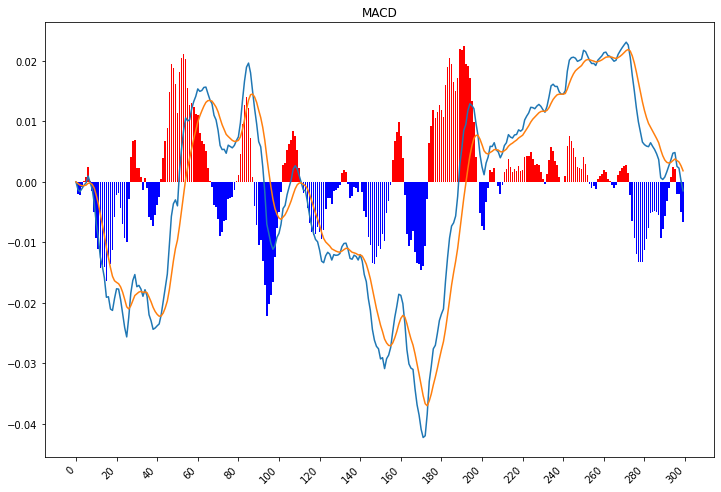

In [256]:
def format_date(x, pos=None):
    if x < 0 or x > len(df['date']) - 1:
        return ''
    return df['date'][int(x)]

figure = plt.figure(figsize=(12, 8))
ax = figure.add_subplot(111)
plus_hist = np.where(macd1.histgram > 0, macd1.histgram, 0)
minus_hist = np.where(macd1.histgram < 0, macd1.histgram, 0)

ax.plot(np.arange(0, len(macd1.df)), macd1.macd_line)
ax.plot(np.arange(0, len(macd1.df)), macd1.signal)

ax.bar(np.arange(0, len(macd1.df)), plus_hist, color="red")
ax.bar(np.arange(0, len(macd1.df)), minus_hist, color="blue")
ax.xaxis.set_major_locator(ticker.MaxNLocator(20))
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("MACD")
plt.show()